<a href="https://colab.research.google.com/github/inconw/ProjectPortfolio/blob/main/L09_IngridConway.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 9
## Ingrid Conway
### University of Washington - DATASCI 420 CS
### Nov 19, 2020

For this scenario, we imagine ourselves working for a startup building the next generation search engine. This search engine is to provide the ability to search for images based on the content of them.  We are tasked to build a machine learning model that is able to identify the objects in images. For this project we will use the CIFAR-10 dataset, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class.

In [ ]:
import tarfile
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from scipy import ndimage
from skimage import transform

In [ ]:
# enable GPU for neural network training speedup
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')
print(device_name)



/device:GPU:0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Conv3D,MaxPool2D
from tensorflow.keras.optimizers import SGD
import datetime, os

In [ ]:
cifar = keras.datasets.cifar10.load_data()



170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [ ]:
print(train_images.shape)
# Notice train-labels shape is 2 dimensional.
print(train_labels.shape)
# Print red channel layer (top left corner) of first image. Notice these are integers between 0 and 255.
print(train_images[0, :5, :5, 1])
print(train_labels[0])

(50000, 32, 32, 3)
(50000, 1)
[[62 46 48 54 73]
 [20  0  8 27 51]
 [24  7 27 50 72]
 [25 20 54 63 70]
 [32 32 65 79 77]]
[6]


In [ ]:
# Setup class names
class_names= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Separate validation sets from train sets
validation_images, validation_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

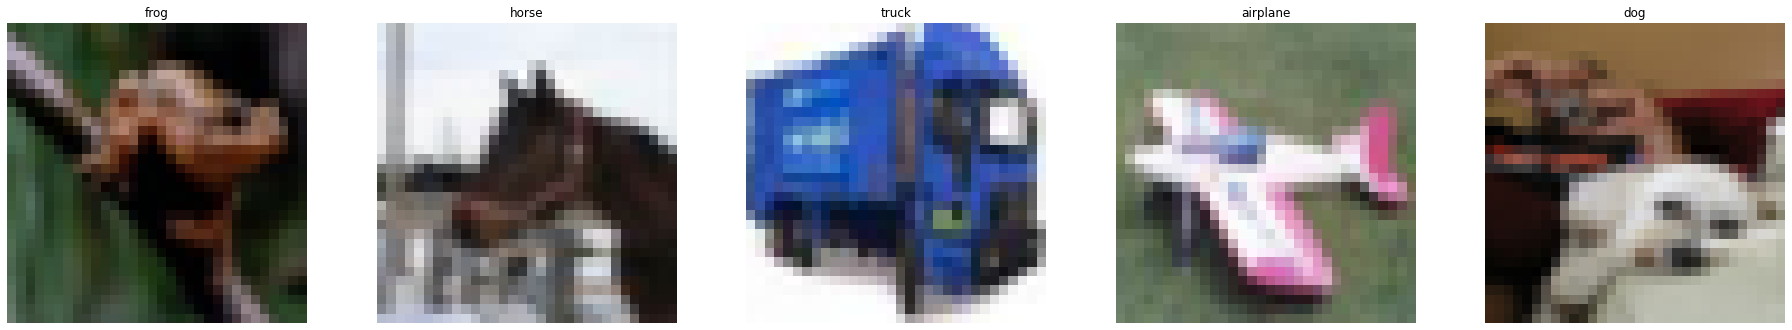

In [ ]:
# Lets take a look at the first few images

plt.figure(figsize=(32,32))
for i, (image, label) in enumerate(zip(train_images[:5,:,:,:], train_labels[:5,:])):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(class_names[label[0]])
    plt.axis('off')

In [ ]:
# Standardize all images

train_images = train_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

In [ ]:
# more preprocessing



In [ ]:
# Add convolution layers

#https://www.tensorflow.org/tutorials/images/cnn

We introduce our model, and add convolutional layers.

In [ ]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
# add fully connected/ dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [ ]:
#Compile and train data
# plug in training data. where we fit the model to our data, the training process
with tf.device('/device:GPU:0'):   #### THIS WILL NOT WORK ON YOUR LAPTOP
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  history = model.fit(train_images, train_labels, epochs=10, 
                      validation_data=(test_images, test_labels))

Epoch 1/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.5544 - accuracy: 0.4299 - val_loss: 1.2860 - val_accuracy: 0.5345
Epoch 2/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.2065 - accuracy: 0.5697 - val_loss: 1.1110 - val_accuracy: 0.6073
Epoch 3/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.0435 - accuracy: 0.6322 - val_loss: 1.0983 - val_accuracy: 0.6092
Epoch 4/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.9480 - accuracy: 0.6680 - val_loss: 0.9900 - val_accuracy: 0.6587
Epoch 5/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.8699 - accuracy: 0.6947 - val_loss: 0.9632 - val_accuracy: 0.6674
Epoch 6/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8090 - accuracy: 0.7149 - val_loss: 0.9108 - val_accuracy: 0.6904
Epoch 7/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.7548 - accuracy: 0.7368 - val_loss: 0.9256 - val_accuracy:

313/313 - 1s - loss: 0.8548 - accuracy: 0.7093


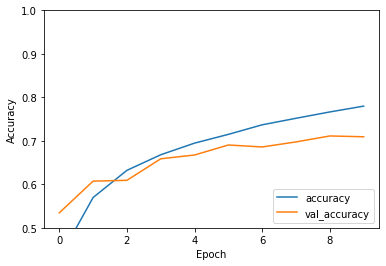

In [ ]:
# Evaluate the Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model has 69% accuracy, which actually is reasonably good compared to pure guessing. For 10 classes, randomly guessing prob. is 1 in 10. For 2 classes, you'd want your accuracy to be better than 1 in 2, 50%.

In [ ]:
print(test_acc)

0.7092999815940857


**bold text**# 5
Our second model...

lx: 32.   ly: 32
x_crop1:x_crop2  y_crop1:y_crop2      3:-4,  3:-4


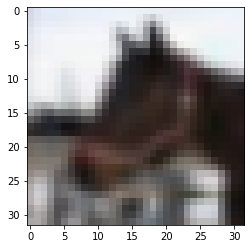

In [ ]:
import numpy as np
# Random crop function:
def rand_crop_im(my_image):
    lx, ly = my_image.shape[0:2]
    print(f'lx: {lx}.   ly: {ly}')
    rand_crop_proportion = np.random.choice([9, 10, 11 ])
    y_crop1 = ly // rand_crop_proportion
    y_crop2 = - ly // rand_crop_proportion
    x_crop1 = lx // rand_crop_proportion
    x_crop2 = - lx // rand_crop_proportion
    print(f'x_crop1:x_crop2  y_crop1:y_crop2      {x_crop1}:{x_crop2},  {y_crop1}:{y_crop2}')
    crop_rand = my_image[x_crop1:x_crop2, y_crop1:y_crop2, : ]

    # resize back to shape
    crop_rand = transform.resize(crop_rand, (lx, ly, 3), order=1)
    return(crop_rand)

#plt.imshow(rand_crop_im(train_images[0])[0], cmap='gray')
plt.imshow(rand_crop_im(train_images[1]) )

In [ ]:
#%tensorflow_version 2.3

In [ ]:
tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [ ]:
train_images[0].shape

(32, 32, 3)

In [ ]:
# Random crop, 20x20 
# Random crop function:
def rand_crop_im(my_image):
  crop_rand = tf.image.random_crop(my_image, [5,20,3])
  return(crop_rand)

r_crop = rand_crop_im(train_images[0])
r_crop.shape

TensorShape([5, 20, 3])

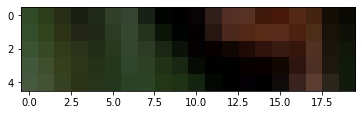

In [ ]:
#plt.imshow(r[0], cmap='gray')
plt.imshow(r_crop)

In [ ]:
train_images[0].shape

(32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


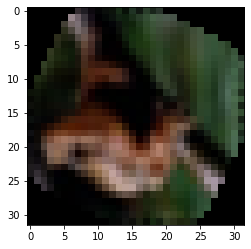

In [ ]:
from scipy import ndimage
from skimage import transform
# Random Rotation function:
def rand_rotation_im(my_image):
    rand_angle = np.random.choice(range(1, 360))
    my_image[:, :, :] = ndimage.rotate(
        my_image[:, :, :], 
        rand_angle, 
        cval=my_image[:, :, :].min(), 
        reshape=False)
    return my_image

#plt.imshow(rand_rotation_im(train_images[0])[0], cmap='gray')
plt.imshow(rand_rotation_im(train_images[0]) ) 

In [ ]:
## MODEL from 
## https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
## without augmentation of rotations and crops

import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
model = define_model()

In [ ]:
with tf.device('/device:GPU:0'):   #### THIS WILL NOT WORK ON YOUR LAPTOP
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  history = model.fit(train_images, train_labels, epochs=10, 
                      validation_data=(test_images, test_labels))

Epoch 1/10
1407/1407 [==============================] - 5s 4ms/step - loss: 2.2252 - accuracy: 0.2273 - val_loss: 2.0645 - val_accuracy: 0.3894
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 2.0775 - accuracy: 0.3769 - val_loss: 2.0256 - val_accuracy: 0.4317
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 2.0338 - accuracy: 0.4210 - val_loss: 1.9893 - val_accuracy: 0.4664
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.9987 - accuracy: 0.4572 - val_loss: 1.9338 - val_accuracy: 0.5251
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.9720 - accuracy: 0.4844 - val_loss: 1.9199 - val_accuracy: 0.5372
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.9603 - accuracy: 0.4970 - val_loss: 1.8941 - val_accuracy: 0.5627
Epoch 7/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.9497 - accuracy: 0.5076 - val_loss: 1.9426 - val_accuracy:

Below we plot our test and validation accuracy....

313/313 - 1s - loss: 1.8580 - accuracy: 0.6013


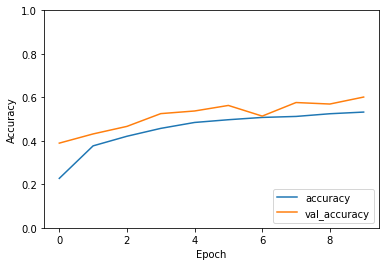

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# 6
For our third model, we add dialation parameter to our CNN model.
-fiddled with dialation rate values

In [ ]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), dilation_rate=(3,2), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), dilation_rate=(3,2), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), dilation_rate=(3,2), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
model = define_model()

In [ ]:
with tf.device('/device:GPU:0'):   #### THIS WILL NOT WORK ON YOUR LAPTOP
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  history = model.fit(train_images, train_labels, epochs=10, 
                      validation_data=(test_images, test_labels))

Epoch 1/10
1407/1407 [==============================] - 7s 5ms/step - loss: 2.1614 - accuracy: 0.2878 - val_loss: 2.0430 - val_accuracy: 0.4127
Epoch 2/10
1407/1407 [==============================] - 6s 5ms/step - loss: 2.0555 - accuracy: 0.3998 - val_loss: 1.9909 - val_accuracy: 0.4659
Epoch 3/10
1407/1407 [==============================] - 6s 5ms/step - loss: 2.0162 - accuracy: 0.4400 - val_loss: 1.9542 - val_accuracy: 0.5061
Epoch 4/10
1407/1407 [==============================] - 6s 5ms/step - loss: 1.9915 - accuracy: 0.4645 - val_loss: 1.9814 - val_accuracy: 0.4741
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.9705 - accuracy: 0.4867 - val_loss: 1.9232 - val_accuracy: 0.5354
Epoch 6/10
1407/1407 [==============================] - 6s 5ms/step - loss: 1.9708 - accuracy: 0.4865 - val_loss: 1.9235 - val_accuracy: 0.5340
Epoch 7/10
1407/1407 [==============================] - 6s 5ms/step - loss: 1.9597 - accuracy: 0.4972 - val_loss: 1.9149 - val_accuracy:

Below we plot the accuracy for the third model with dialation. For this model, we tried several 'dialation_rate' touples to see if we could improve accuracy. Generally, we found that different dialation settings didnt improve the accuracy.

313/313 - 1s - loss: 1.8979 - accuracy: 0.5591


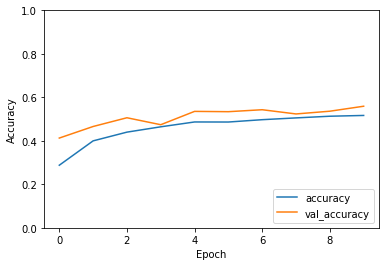

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)